In [1]:
import numpy as np
import symforce

symforce.set_backend("sympy")
symforce.set_log_level("warning")
from symforce.notebook_util import display, print_expression_tree

from symforce import sympy as sm

In [2]:
x = sm.Symbol("x")
y = sm.Symbol("y")

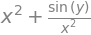

In [3]:
expr = x ** 2 + sm.sin(y) / x ** 2
display(expr)

In [4]:
print_expression_tree(expr)

Add: x**2 + sin(y)/x**2
+-Pow: x**2
| +-Symbol: x
| +-Integer: 2
+-Mul: sin(y)/x**2
  +-Pow: x**(-2)
  | +-Symbol: x
  | +-Integer: -2
  +-sin: sin(y)
    +-Symbol: y


In [5]:
display(expr.subs({x: 1.2, y: 0.4}))

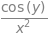

In [6]:
display(expr.diff(y))

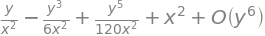

In [7]:
display(sm.series(expr, y))

In [23]:
sm.var("T, v_o, L, a, b, eps")
T = sm.Symbol("T")
v_0 = sm.Symbol("v_0")
L = sm.Symbol("L")
a = sm.Symbol("a")
b = sm.Symbol("b")
eps = sm.Symbol("e")
x = sm.Symbol("x")

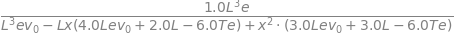

In [26]:
eq1 = sm.Eq(T, v_0 * L + (1/3)*a*L*L*L + (1/2)*b*L*L)
eq2 = sm.Eq(1/eps, v_0 + a * L*L + b * L)
z = sm.solve([eq1, eq2], [a, b])
z_a = z[a]
z_b = z[b]

out = 1.0 / (z_a * x*x + z_b * x + v_0)
sm.simplify(out)

In [28]:
def get_v(x, arrival_time, distance, initial_v, small_positive=1e-5):
    return  1.0 * distance**3 * small_positive / \
            (L**3*small_positive*initial_v
             - distance * x * (4.0 * distance * small_positive * initial_v + 2.0 * distance - 6.0 * arrival_time * small_positive)
             + x**2 * (3.0 * distance * small_positive * initial_v + 3.0 * distance - 6.0 * arrival_time * small_positive))

In [29]:
at = 10
dist = 10
iv = 1.3
out_v = [x for x in np.linspace(0, 10, 100)]

NameError: name 'np' is not defined